# Geolocation Data

Geospatial information is data that is referenced by spatial or geographic coordinates. The data that we will be working with in this lesson is vector data - features that are represented by points, lines, and polygons. <br>
 - **Points** are defined by a pair of (x,y) coordinates. They usually represent locations, place names, and other objects on the ground.
 - **Lines** are the connection between two points. They can have properties such as length, direction, flow, etc.
 - **Polygons** are a series of lines connected together to form a shape. They can have properties such as area, perimeters, and centroids. 
 
In this notebook, you will need to install the [geopandas](https://anaconda.org/conda-forge/geopandas) and [geoPy](https://anaconda.org/conda-forge/geopy) libraries. Also, download [this text file](https://automating-gis-processes.github.io/CSC18/_static/data/L3/addresses.txt) to use in the example code below.

In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [2]:
#pip install descartes

In [3]:
from descartes import PolygonPatch

### Geocoding and Reverse Geocoding

Geocoding is taking an address for a location and returning its latitudinal and longitudinal coordinates. Reverse geocoding would then be the opposite - taking the latitudinal and longitudinal coordinates for a location and returning the physical address.

In [4]:
#take an address and return coordinates
#returned variable is a geo-dataframe with 2 columns, geometry (the geographical shape) and the full physical address
ex1_geo = geocode("12 South Summit Avenue, Gaithersburg, MD", provider='nominatim')
ex1_geo

C:\ProgramData\Anaconda3\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


,geometry,address
0,POINT (-77.19392100403969 39.14089855),"12, South Summit Avenue, Gaithersburg, Montgom..."


In [5]:
#structure of full address
#each API structures addresses differently
ex1_geo['address'].iloc[0]

'12, South Summit Avenue, Gaithersburg, Montgomery County, Maryland, 20877, USA'

In [6]:
#use latitude and longitude to get physical address
#pass through using Point geometry
#also returns geo-dataframe with geometry and full physical address
ex2_geo = reverse_geocode([Point(-77.15879730243169, 39.0985195)], provider='nominatim')
ex2_geo

,geometry,address
0,POINT (-77.15879730243169 39.0985195),"Montgomery College, 51, Mannakee Street, Westm..."


In [9]:
ex2_geo['address'].iloc[0]

'Montgomery College, 51, Mannakee Street, Westmore, King Farm, Rockville, Montgomery County, Maryland, 20850, USA'

In [8]:
ex3_geo = reverse_geocode([Point(141.115496, 39.711080)], provider='nominatim')
ex3_geo 

,geometry,address
0,POINT (141.11550439398 39.711186363722),"前潟一丁目, 盛岡市, 岩手県, 東北地方, 020-0063, 日本"


In [10]:
ex3_geo['address'].iloc[0]

'前潟一丁目, 盛岡市, 岩手県, 東北地方, 020-0063, 日本'

In [19]:
ex4_geo = reverse_geocode([Point(141.133601, 39.701035)], provider='nominatim')
ex4_geo 

,geometry,address
0,POINT (141.133633661679 39.7012247),"マリオス, マリオスロード, 盛岡駅西通一丁目, 盛岡市, 岩手県, 東北地方, 020-0..."


In [20]:
ex5_geo = geocode("3737 Muscatel Avenue, Rosemead, CA", provider='nominatim')
ex5_geo

,geometry,address
0,POINT (-118.077563921053 34.0764614210526),"3737, Muscatel Avenue, Rosemead, Los Angeles C..."


#### Geocode a Dataframe column

In [7]:
#dataset of addresses in Finland
location = "datasets/addresses.txt"

#load data into dataframe
#seperator between values in file is a semicolon
finland_df = pd.read_csv(location, sep=";")
finland_df.head()

,id,addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


In [8]:
#geocode an entire column in a dataframe
geo_addr = geocode(finland_df['addr'], provider='nominatim')

In [9]:
#first 5 rows of geo-dataframe of Finland addresses
geo_addr.head()

,geometry,address
0,POINT (24.9155624 60.1632015),"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns..."
1,POINT (24.9316914 60.1690222),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp..."
2,POINT (24.9416849 60.1699637),"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel..."
3,POINT (24.9766565 60.1941164),"Hermannin rantatie, Hermanninranta, Hermanni, ..."
4,POINT (24.9216003 60.1566475),"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län..."


In [10]:
#add the geometry column (coordinates) to the original dataframe 
finland_df['geo_addr'] = geo_addr['geometry']
finland_df.head()

,id,addr,geo_addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.9155624 60.1632015)
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.9316914 60.1690222)
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.9416849 60.1699637)
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.9766565 60.1941164)
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.9216003 60.1566475)


### NASA Meteorite Landings

At the end of your notebook for the NASA Meteorite data exercise, add a new cell with the code `df.to_csv("datasets/NASAmeteorite.csv")`. Run that cell to create a csv file of your meteorite data to use in the following examples. Then [download the `continents.json` GeoJSON file](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/Lv2%20Data%20Analytics) for the world map that will be charted.

In [11]:
#load meteorite data collected from NASA Open Data API
meteor_df = pd.read_csv("datasets/NASAmeteorite.csv")
meteor_df.head()

,id,year,fall,name,name_type,mass,latitude,longitude,type
0,1,1880-01-01T00:00:00.000,Fell,Aachen,Valid,21.0,50.77500,6.08333,Point
1,2,1951-01-01T00:00:00.000,Fell,Aarhus,Valid,720.0,56.18333,10.23333,Point
2,6,1952-01-01T00:00:00.000,Fell,Abee,Valid,107000.0,54.21667,-113.00000,Point
3,10,1976-01-01T00:00:00.000,Fell,Acapulco,Valid,1914.0,16.88333,-99.90000,Point
4,370,1902-01-01T00:00:00.000,Fell,Achiras,Valid,780.0,-33.16667,-64.95000,Point


In [12]:
#data type of each column
meteor_df.dtypes

id             int64
year          object
fall          object
name          object
name_type     object
mass         float64
latitude     float64
longitude    float64
type          object
dtype: object

In [13]:
#only dataframe with non-null year column values
meteor_df = meteor_df.loc[meteor_df['year'].notnull()]

#change year column into a string
#need to use string type for getYear function below
meteor_df['year'] = meteor_df['year'].astype(str)

In [14]:
#function to split apart the date from the timestamp
def getYear(col):
    #get YYYY-MM-DD value
    date = col.split("T")[0]
    
    #extract year from date
    dt = datetime.strptime(date, '%Y-%m-%d')
    return dt.year

In [15]:
#replace the year timestamp data with only the year (using the getYear function)
meteor_df['year'] = meteor_df['year'].apply(getYear)
meteor_df.head()

,id,year,fall,name,name_type,mass,latitude,longitude,type
0,1,1880,Fell,Aachen,Valid,21.0,50.77500,6.08333,Point
1,2,1951,Fell,Aarhus,Valid,720.0,56.18333,10.23333,Point
2,6,1952,Fell,Abee,Valid,107000.0,54.21667,-113.00000,Point
3,10,1976,Fell,Acapulco,Valid,1914.0,16.88333,-99.90000,Point
4,370,1902,Fell,Achiras,Valid,780.0,-33.16667,-64.95000,Point


In [16]:
#see columns with null values
meteor_df.count()

id           999
year         999
fall         999
name         999
name_type    999
mass         971
latitude     987
longitude    987
type         987
dtype: int64

In [17]:
#only include rows with non-null latitudes (which means longitude is also not null) and non-null mass
meteor_df = meteor_df.loc[(meteor_df['latitude'].notnull()) & meteor_df['mass'].notnull()]
meteor_df.count()

id           959
year         959
fall         959
name         959
name_type    959
mass         959
latitude     959
longitude    959
type         959
dtype: int64

In [18]:
#make a new column to hold the longitude & latitude as a list
meteor_df['coordinates'] = list(meteor_df[['longitude', 'latitude']].values)

In [19]:
#see new coordinates column
meteor_df.head()

,id,year,fall,name,name_type,mass,latitude,longitude,type,coordinates
0,1,1880,Fell,Aachen,Valid,21.0,50.77500,6.08333,Point,"[6.08333, 50.775]"
1,2,1951,Fell,Aarhus,Valid,720.0,56.18333,10.23333,Point,"[10.23333, 56.183330000000005]"
2,6,1952,Fell,Abee,Valid,107000.0,54.21667,-113.00000,Point,"[-113.0, 54.21666999999999]"
3,10,1976,Fell,Acapulco,Valid,1914.0,16.88333,-99.90000,Point,"[-99.9, 16.883329999999997]"
4,370,1902,Fell,Achiras,Valid,780.0,-33.16667,-64.95000,Point,"[-64.95, -33.16667]"


In [20]:
#list values in coordinates column is classified as object type
meteor_df['coordinates'].dtypes

dtype('O')

In [21]:
#convert the coordinates to a geolocation type
meteor_df['coordinates'] = meteor_df['coordinates'].apply(Point)

In [22]:
#coordinates column now has POINT next to each coordinate pair value
meteor_df.head()

,id,year,fall,name,name_type,mass,latitude,longitude,type,coordinates
0,1,1880,Fell,Aachen,Valid,21.0,50.77500,6.08333,Point,POINT (6.08333 50.775)
1,2,1951,Fell,Aarhus,Valid,720.0,56.18333,10.23333,Point,POINT (10.23333 56.18333000000001)
2,6,1952,Fell,Abee,Valid,107000.0,54.21667,-113.00000,Point,POINT (-113 54.21666999999999)
3,10,1976,Fell,Acapulco,Valid,1914.0,16.88333,-99.90000,Point,POINT (-99.90000000000001 16.88333)
4,370,1902,Fell,Achiras,Valid,780.0,-33.16667,-64.95000,Point,POINT (-64.95 -33.16667)


In [23]:
#coordinates column with geolocation data is just a regular pandas Series type
type(meteor_df['coordinates'])

pandas.core.series.Series

In [24]:
#create a geolocation dataframe type using the coordinates column as the geolocation data
geo_meteor = gpd.GeoDataFrame(meteor_df, geometry='coordinates')

In [25]:
#geo-dataframe looks the same as regular dataframe
geo_meteor.head()

,id,year,fall,name,name_type,mass,latitude,longitude,type,coordinates
0,1,1880,Fell,Aachen,Valid,21.0,50.77500,6.08333,Point,POINT (6.08333 50.775)
1,2,1951,Fell,Aarhus,Valid,720.0,56.18333,10.23333,Point,POINT (10.23333 56.18333000000001)
2,6,1952,Fell,Abee,Valid,107000.0,54.21667,-113.00000,Point,POINT (-113 54.21666999999999)
3,10,1976,Fell,Acapulco,Valid,1914.0,16.88333,-99.90000,Point,POINT (-99.90000000000001 16.88333)
4,370,1902,Fell,Achiras,Valid,780.0,-33.16667,-64.95000,Point,POINT (-64.95 -33.16667)


In [26]:
#verify coordinates column is geolocation data type
type(geo_meteor['coordinates'])

geopandas.geoseries.GeoSeries

In [27]:
#import file that contains a world map shape polygons
#will use to plot the coordinates of meteorite landings
filepath = "datasets/continents.json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,CONTINENT,geometry
0,Asia,(POLYGON ((93.27554321289063 80.26361083984375...
1,North America,(POLYGON ((-25.28166961669922 71.3916625976562...
2,Europe,(POLYGON ((58.06137847900391 81.68775939941406...
3,Africa,(POLYGON ((0.694651007652283 5.773365020751953...
4,South America,(POLYGON ((-81.71305847167969 12.4902763366699...


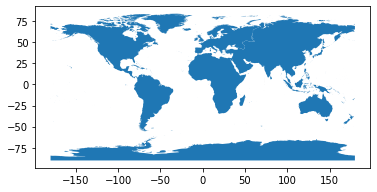

In [28]:
#map graph
map_df.plot()

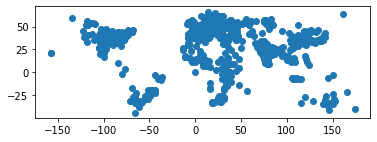

In [29]:
#plot the coordinates (no map)
geo_meteor.plot()

Text(0.5, 1, 'NASA Meteorite Landings')

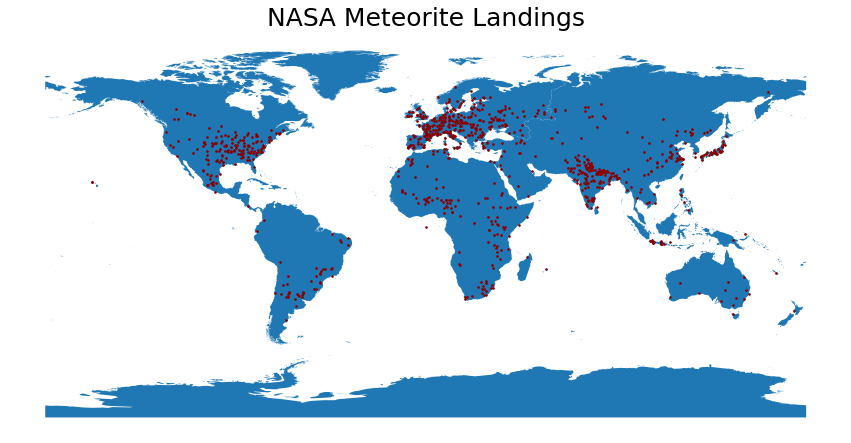

In [30]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map_df.plot(ax=ax)

#plot coordinates on top of map graph
geo_meteor.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("NASA Meteorite Landings", fontsize=25, fontweight=3)